In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
element_df = pd.read_csv('air_lichen_query.csv', engine='python', on_bad_lines='skip')

element_df.head(20)

,Name,Code for scientific name and authority in lookup table,Plot number,National Forest or other area,Latitude (decimal degrees),Longitude (decimal degrees),Wilderness Area,Region,Sample number,Year of tissue collection,...,Ecoregion III,Ecoregion IV,Distance from coast (miles),Precipitation (cm/yr),Mean mininum daily temperature (&deg;C),Air pollution score,Taxonomic authority,Common name,AQ Rating,Unnamed: 66
0,NaN,blank,NaN,NaN,NaN,NaN,NaN,6,2008185,2008.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Letharia vulpina,letvul,1034164B,Fremont-Winema National Forests,42.690,-121.890,NaN,6,2000952,2000.0,...,Eastern Cascades Slopes and Foothills,Pumice Plateau Forest,124.5,74.0,269.000,0.179,(L.) Hue,Wolf lichen,tolerant,NaN
2,NaN,usnlon,1106044,Siuslaw National Forest,44.470,-123.920,Drift Creek Wilderness,6,1996025,1996.0,...,Mid-coastal Sedimentary,4.9,232.0,398.0,-0.463,Ach.,Beard lichen,most sensitive,NaN,NaN
3,Letharia vulpina,letvul,1020244,Fremont-Winema National Forests,42.320,-120.570,NaN,6,2003187,2003.0,...,Eastern Cascades Slopes and Foothills,NaN,NaN,49.0,NaN,NaN,(L.) Hue,Wolf lichen,tolerant,NaN
4,Sphaerophorus globosus,sphglo,1174156,Gifford Pinchot National Forest,46.140,-121.970,NaN,6,1997571,1997.0,...,Western Cascades Montane Highlands,67.6,261.0,319.0,-0.576,(Hudson) Vainio,Coral lichen,intermediate,NaN,NaN
5,Alectoria sarmentosa,alesar,1086120,Willamette National Forest,43.980,-122.620,NaN,6,2005121,2005.0,...,NaN,NaN,144.0,NaN,-0.168,(Ach.) Ach.,Goat's beard lichen,sensitive,NaN,NaN
6,NaN,flacap,Monong068B,Monongahela National Forest,38.961,-79.647,Otter Creek Wilderness,89,NaN,1992.0,...,NaN,NaN,142.0,NaN,NaN,(L.) Hale,Yellow shield,NaN,NaN,NaN
7,Platismatia glauca,plagla,Hyslp514,Albany,44.652,-123.222,NaN,6,2000107,2000.0,...,Prairie Terraces,36.9,117.0,393.0,NaN,(L.) Culb. & C. Culb.,Rag lichen,most tolerant,NaN,NaN
8,Alectoria sarmentosa,alesar,1086128,Willamette National Forest,43.980,-122.480,NaN,6,1996088,1996.0,...,Cascades,Western Cascades Lowlands and Valleys,75.9,166.0,350.000,-0.235,(Ach.) Ach.,Goat's beard lichen,sensitive,NaN
9,NaN,xancum,ChirNM02,Chiricahua National Monument,32.009,-109.312,Chiricahua National Monument Wilderness,14,254,1993.0,...,NaN,NaN,61.0,NaN,NaN,(Gyelnik) Hale,Questionable rockfrog,sensitive,NaN,NaN


In [3]:
element_df['Aluminum (ppm dw)'].describe()

count    12238.000000
mean       556.026352
std        979.587372
min         -2.431000
25%        105.000000
50%        350.245000
75%        659.300000
max      22377.000000
Name: Aluminum (ppm dw), dtype: float64

In [4]:
element_df['Calcium (ppm dw)'].describe()

count     12680.000000
mean       5431.973496
std        9130.267742
min          -0.170000
25%        1643.095000
50%        2560.300000
75%        5108.250000
max      158000.000000
Name: Calcium (ppm dw), dtype: float64

In [5]:
element_df['Managanese (ppm dw)'].describe()

count    12688.000000
mean       168.145356
std        163.451088
min         -0.911000
25%         62.742000
50%        114.730000
75%        222.100000
max       4541.800000
Name: Managanese (ppm dw), dtype: float64

In [6]:
(element_df['Aluminum (ppm dw)'] < 0).sum()

np.int64(2)

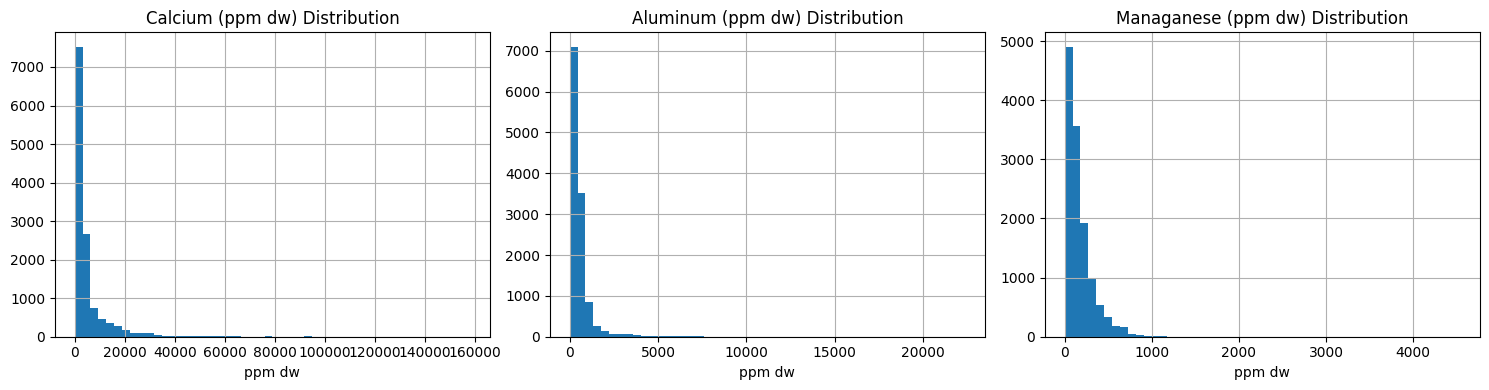

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(['Calcium (ppm dw)', 'Aluminum (ppm dw)', 'Managanese (ppm dw)']):
    element_df[col].hist(bins=50, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel('ppm dw')

plt.tight_layout()
plt.show()

<Axes: ylabel='Frequency'>

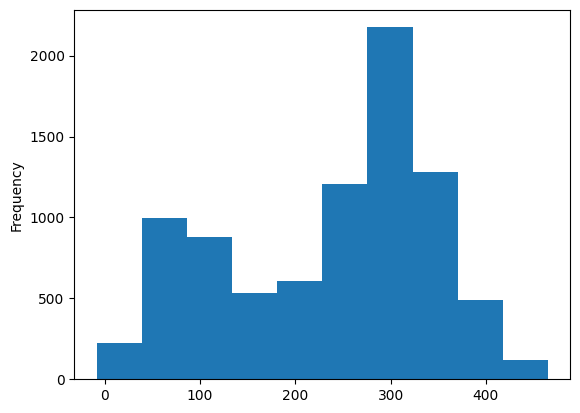

In [7]:
element_df['Precipitation (cm/yr)'].plot(kind='hist')

In [ ]:
precip_na = element_df['Precipitation (cm/yr)'].isna().sum()

print(element_df['Precipitation (cm/yr)'].describe())

print('Proportion of NaN for Precipitation: ', precip_na / len(element_df))

In [16]:
def discretize_precip(df):
    df = df.copy()
    df.loc[df['Precipitation (cm/yr)'] < 0, 'Precipitation (cm/yr)'] = 0
    bins = [0, 100, 200, 300, float('inf')]
    labels = ['Moderate Precipitation (<100 cm/yr)', 'High (100-200 cm/yr)', 'Very High (200-300 cm/yr)', 'Extreme (>300 cm/yr)']
    df['Binned Precipitation'] = pd.cut(df['Precipitation (cm/yr)'], bins=bins, labels=labels, include_lowest=True)
    return df

element_df_precip = discretize_precip(element_df)

element_df_precip.head(10)

,Name,Code for scientific name and authority in lookup table,Plot number,National Forest or other area,Latitude (decimal degrees),Longitude (decimal degrees),Wilderness Area,Region,Sample number,Year of tissue collection,...,Ecoregion IV,Distance from coast (miles),Precipitation (cm/yr),Mean mininum daily temperature (&deg;C),Air pollution score,Taxonomic authority,Common name,AQ Rating,Unnamed: 66,Binned Precipitation
0,NaN,blank,NaN,NaN,NaN,NaN,NaN,6,2008185,2008.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Letharia vulpina,letvul,1034164B,Fremont-Winema National Forests,42.690,-121.890,NaN,6,2000952,2000.0,...,Pumice Plateau Forest,124.5,74.0,269.000,0.179,(L.) Hue,Wolf lichen,tolerant,NaN,Moderate Precipitation (<100 cm/yr)
2,NaN,usnlon,1106044,Siuslaw National Forest,44.470,-123.920,Drift Creek Wilderness,6,1996025,1996.0,...,4.9,232.0,398.0,-0.463,Ach.,Beard lichen,most sensitive,NaN,NaN,Extreme (>300 cm/yr)
3,Letharia vulpina,letvul,1020244,Fremont-Winema National Forests,42.320,-120.570,NaN,6,2003187,2003.0,...,NaN,NaN,49.0,NaN,NaN,(L.) Hue,Wolf lichen,tolerant,NaN,Moderate Precipitation (<100 cm/yr)
4,Sphaerophorus globosus,sphglo,1174156,Gifford Pinchot National Forest,46.140,-121.970,NaN,6,1997571,1997.0,...,67.6,261.0,319.0,-0.576,(Hudson) Vainio,Coral lichen,intermediate,NaN,NaN,Extreme (>300 cm/yr)
5,Alectoria sarmentosa,alesar,1086120,Willamette National Forest,43.980,-122.620,NaN,6,2005121,2005.0,...,NaN,144.0,NaN,-0.168,(Ach.) Ach.,Goat's beard lichen,sensitive,NaN,NaN,NaN
6,NaN,flacap,Monong068B,Monongahela National Forest,38.961,-79.647,Otter Creek Wilderness,89,NaN,1992.0,...,NaN,142.0,NaN,NaN,(L.) Hale,Yellow shield,NaN,NaN,NaN,NaN
7,Platismatia glauca,plagla,Hyslp514,Albany,44.652,-123.222,NaN,6,2000107,2000.0,...,36.9,117.0,393.0,NaN,(L.) Culb. & C. Culb.,Rag lichen,most tolerant,NaN,NaN,Extreme (>300 cm/yr)
8,Alectoria sarmentosa,alesar,1086128,Willamette National Forest,43.980,-122.480,NaN,6,1996088,1996.0,...,Western Cascades Lowlands and Valleys,75.9,166.0,350.000,-0.235,(Ach.) Ach.,Goat's beard lichen,sensitive,NaN,High (100-200 cm/yr)
9,NaN,xancum,ChirNM02,Chiricahua National Monument,32.009,-109.312,Chiricahua National Monument Wilderness,14,254,1993.0,...,NaN,61.0,NaN,NaN,(Gyelnik) Hale,Questionable rockfrog,sensitive,NaN,NaN,NaN


In [ ]:
def discretize_soil_chem(df):
    df = df.copy()

    # Remove negative values
    for col in ['Calcium (ppm dw)', 'Aluminum (ppm dw)', 'Managanese (ppm dw)']:
        df.loc[df[col] < 0, col] = 0

    aluminum_bins = [0, 200, 400, 700, float('inf')]
    aluminum_labels = ['Low (0-200)', 'Moderate (200-400)',
                       'High (400-700)', 'Very High (>700)']

    calcium_bins = [0, 2000, 3500, 6000, float('inf')]
    calcium_labels = ['Low (0-2000)', 'Moderate (2000-3500)',
                      'High (3500-6000)', 'Very High (>6000)']

    manganese_bins = [0, 100, 150, 250, float('inf')]
    manganese_labels = ['Low (0-100)', 'Moderate (100-150)',
                        'High (150-250)', 'Very High (>250)']

    df['Binned Calcium'] = pd.cut(df['Calcium (ppm dw)'], bins=calcium_bins,
                                   labels=calcium_labels, include_lowest=True)

    df['Binned Aluminum'] = pd.cut(df['Aluminum (ppm dw)'], bins=aluminum_bins,
                                    labels=aluminum_labels, include_lowest=True)

    df['Binned Managanese'] = pd.cut(df['Managanese (ppm dw)'], bins=manganese_bins,
                                      labels=manganese_labels, include_lowest=True)

    return df